# This code visualizes traffic injuries and traffic fatalities in New York City from 2012 to 2017

Import packages and the file as a dataframe

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('SUPER_CLEANED_NYPD_TRAFFIC_COLLISION.csv')



In the next cell we create two dictionaries, one corresponding to the injuries and the other corresponding to fatalities. Both these dictionaries contain the different years from 2012 to 2017 as keys and the corresponding values are nested lists with the latitude and longitude values

In [2]:
#The list on 0 index in each year is the Latitude
#The list on 1 index in each year is the Longitude
FatalityYear={2012:[[],[]], 2013:[[],[]],2014:[[],[]], 2015:[[],[]], 2016:[[],[]], 2017:[[],[]]}
InjuryYear={2012:[[],[]], 2013:[[],[]],2014:[[],[]], 2015:[[],[]], 2016:[[],[]], 2017:[[],[]]}
for index, row in df.iterrows():
    a=int(row['NUMBER OF PERSONS INJURED'])
    b=int(row['NUMBER OF PERSONS KILLED'])
    if (a>0) and not(np.isnan(row['LATITUDE']) and np.isnan(row['LONGITUDE'])):
        if int(pd.to_datetime(row['DATE']).year)==2016:
            InjuryYear[2016][0].append(float(row['LATITUDE']))
            InjuryYear[2016][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2015:
            InjuryYear[2015][0].append(float(row['LATITUDE']))
            InjuryYear[2015][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2014:
            InjuryYear[2014][0].append(float(row['LATITUDE']))
            InjuryYear[2014][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2013:
            InjuryYear[2013][0].append(float(row['LATITUDE']))
            InjuryYear[2013][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2012:
            InjuryYear[2012][0].append(float(row['LATITUDE']))
            InjuryYear[2012][1].append(float(row['LONGITUDE']))
    if (b>0) and not(np.isnan(row['LATITUDE']) and np.isnan(row['LONGITUDE'])):
        if int(pd.to_datetime(row['DATE']).year)==2016:
            FatalityYear[2016][0].append(float(row['LATITUDE']))
            FatalityYear[2016][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2015:
            FatalityYear[2015][0].append(float(row['LATITUDE']))
            FatalityYear[2015][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2014:
            FatalityYear[2014][0].append(float(row['LATITUDE']))
            FatalityYear[2014][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2013:
            FatalityYear[2013][0].append(float(row['LATITUDE']))
            FatalityYear[2013][1].append(float(row['LONGITUDE']))
        elif int(pd.to_datetime(row['DATE']).year)==2012:
            FatalityYear[2012][0].append(float(row['LATITUDE']))
            FatalityYear[2012][1].append(float(row['LONGITUDE']))

The next cell visualizes the injuries and fatalities for different years based on what the user wants to visualize and for which year. This also saves the visualization in png format. 
We use the Basemap class instance from the mpl_toolkits.basemap package and pyplot from the matplotlib package to do this
The streets are plotted by retrieving image from the ArcGIS Server REST API using the arcgisimage function
Miller projection is used for the visualization. Appropriate lat-long values are provided which form the lower-left corner and upper-right corner of the image.
We need to specify the appropriate epsg keyword to define the map projection in order to use the ArcGIS image
The verbose = True command prints the URL that is used to retrieve the image
More information regarding the matplotlib basemap toolkit can be found on this webpage: http://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap

What do you want to visualize (Injury/Fatality): Fatality
What year do you want to visualize from the following options, 2012, 2013, 2014, 2015, 2016: 2016
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=901548.9633112256,111350.32271248655,1085008.3960949453,281340.4395828848&bboxSR=2263&imageSR=2263&size=12000,11118&dpi=96&format=png32&f=image


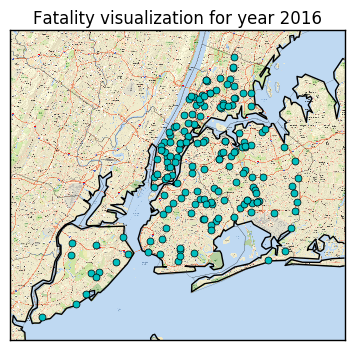

Do you want to see more visualizations (Y/N): N


In [3]:
#Visualization part starts from here
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
def visualize():
    InjuryOrFatality = str(input("What do you want to visualize (Injury/Fatality): "))
    if InjuryOrFatality == 'Injury':
        k =int(input("What year do you want to visualize from the following options, 2012, 2013, 2014, 2015, 2016: "))
        if k==2012 or k==2013 or k==2014 or k==2015 or k==2016:
            m= Basemap(projection='mill', llcrnrlat = 40.471920, llcrnrlon = -74.297241,
                      urcrnrlat=40.938311,
                      urcrnrlon = -73.635315, resolution = 'h', epsg=2263)
            m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 12000, verbose= True)
            m.drawcoastlines()
            m.drawcountries(linewidth=2)
            m.drawcounties()
            m.drawrivers()
            xpt, ypt = m(InjuryYear[k][1],InjuryYear[k][0])
            m.plot(xpt, ypt, 'co', markersize =5)
            title = ("Injury visualization for year " + str(k))
            plt.title(title)
            plt.savefig(("Injury visualization for year " + str(k) +'.png'), dpi=1200)
            plt.show()
            ans = str(input("Do you want to see more visualizations (Y/N): "))
            if ans == 'Y':
                visualize()
            else:
                return
        else:
            print("Incorrect year. Please try again.")
            visualize()
        return
    elif InjuryOrFatality == 'Fatality':
        k =int(input("What year do you want to visualize from the following options, 2012, 2013, 2014, 2015, 2016: "))
        if k==2012 or k==2013 or k==2014 or k==2015 or k==2016:
            m= Basemap(projection='mill', llcrnrlat = 40.471920, llcrnrlon = -74.297241,
                      urcrnrlat=40.938311,
                      urcrnrlon = -73.635315, epsg=2263, resolution = 'h')
            m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 12000, verbose= True)
            m.drawcoastlines()
            m.drawcountries(linewidth=2)
            m.drawcounties()
            m.drawrivers()
            xpt, ypt = m(FatalityYear[k][1],FatalityYear[k][0])
            m.plot(xpt, ypt, 'co', markersize =5)
            title = ("Fatality visualization for year " +str(k))
            plt.title(title)
            plt.savefig(("Fatality visualization for year " + str(k) +'.png'), dpi=1200)
            plt.show()
            ans = str(input("Do you want to see more visualizations (Y/N): "))
            if ans == 'Y':
                visualize()
            else:
                return
        else:
            print("Incorrect year. Please try again.")
            visualize()
        return
    else:
        print("Incorrect option selected. Please try again (Make sure your first letter is in upper case)")
        visualize()

visualize()